In [ ]:
import torch
from src.Faster_RCNN import load_model, get_transform, plot_predictions, predict
from src.dataset import CarDataset

In [ ]:
model = torch.load('./../car_damage_model.pt', map_location=torch.device('cpu'))

In [ ]:
dataset_test = CarDataset("../data/car_damage/", "test", get_transform(train=False))
dataset_train = CarDataset("../data/car_damage/", "train", get_transform(train=False))



In [ ]:
dataset_train.annots['categories']

In [ ]:
img, _ = dataset_test[3]
predictions = predict(model, img)
plot_predictions(img, predictions, dataset_train.annots['categories'], threshold=0.5)

In [ ]:
#YOLOS

In [2]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torch.utils.data import DataLoader
from transformers import YolosFeatureExtractor, YolosForObjectDetection

from torch.utils.tensorboard import SummaryWriter
from src.datatset_coco import CarDataset
from src.yolos import plot_output, collate_with_device


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
feature_extractor = YolosFeatureExtractor.from_pretrained("hustvl/yolos-small")

model = YolosForObjectDetection.from_pretrained(
        "hustvl/yolos-small", num_labels=1, ignore_mismatched_sizes=True
    )
device="cpu"
collate_fn = collate_with_device(device, feature_extractor)
dataset = CarDataset("../data/car_damage/", "train")
train_loader = DataLoader(dataset, batch_size=4, collate_fn=collate_fn)



/usr/local/lib/python3.10/dist-packages/transformers/models/yolos/image_processing_yolos.py:704: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(
Some weights of YolosForObjectDetection were not initialized from the model checkpoint at hustvl/yolos-small and are newly initialized because the shapes did not match:
- class_labels_classifier.layers.2.weight: found shape torch.Size([92, 384]) in the checkpoint and torch.Size([2, 384]) in the model instantiated
- class_labels_classifier.layers.2.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
images, labels = next(iter(train_loader))

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(images, labels)

In [ ]:
outputs.loss

In [ ]:
model.forward??

In [4]:
feature_extractor = YolosFeatureExtractor.from_pretrained("hustvl/yolos-small")

model = YolosForObjectDetection.from_pretrained(
        "hustvl/yolos-small", num_labels=1, ignore_mismatched_sizes=True
    )
device="cpu"
collate_fn = collate_with_device(device, feature_extractor)
dataset = CarDataset("../data/car_damage/", "train")
train_loader = DataLoader(dataset, batch_size=4, collate_fn=collate_fn)



Some weights of YolosForObjectDetection were not initialized from the model checkpoint at hustvl/yolos-small and are newly initialized because the shapes did not match:
- class_labels_classifier.layers.2.weight: found shape torch.Size([92, 384]) in the checkpoint and torch.Size([2, 384]) in the model instantiated
- class_labels_classifier.layers.2.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
model = torch.load("../car_damage_model_yolos.pt")

In [6]:
device="cpu"
collate_fn = collate_with_device(device, feature_extractor)
dataset = CarDataset("../data/car_damage/", "test")
train_loader = DataLoader(dataset, batch_size=1, collate_fn=collate_fn)


In [ ]:
def show_result()

In [36]:
img,_ = dataset[5]

In [37]:
img=feature_extractor.preprocess(img, return_tensors="pt")

In [38]:
model.eval()
with torch.no_grad():
    outputs = model(img['pixel_values'])

In [39]:
img,_ = dataset[5]

tensor(0.8945)


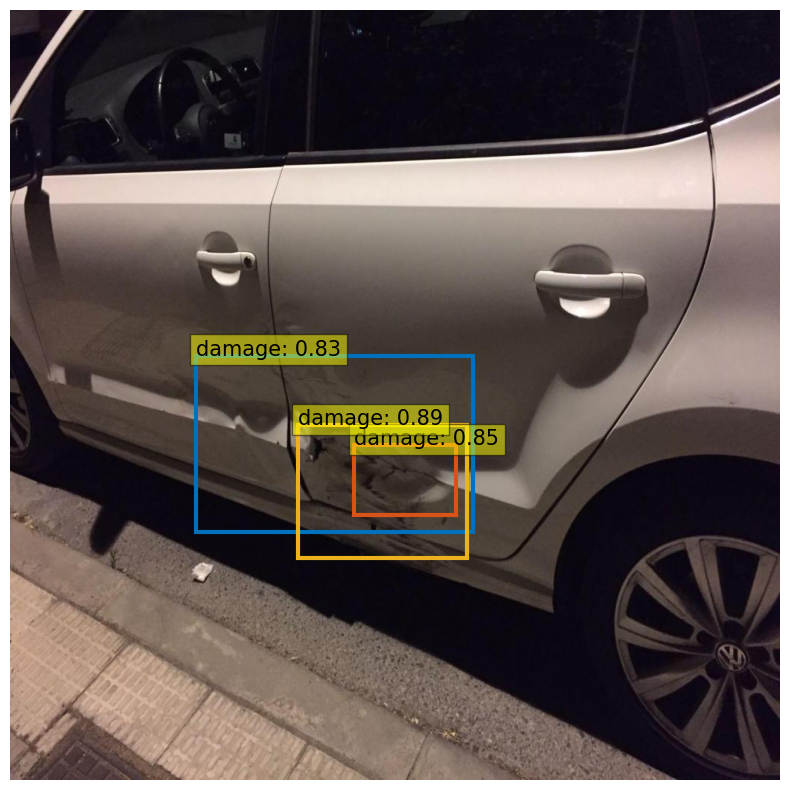

In [40]:
plot_output(outputs, img, feature_extractor,0.7)